# Bayesian Sampler Examples

Examples of running each sampler avaiable in 3ML.


Before, that, let's discuss setting up configuration default sampler with default parameters. We can set in our configuration a default algorithm and default setup parameters for the samplers. This can ease fitting when we are doing exploratory data analysis.

With any of the samplers, you can pass keywords to access their setups. Read each pacakges documentation for more details.


In [1]:
from threeML import *
from threeML.plugins.XYLike import XYLike

import numpy as np
import dynesty
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
silence_warnings()
set_threeML_style()

05:15:25 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=543786;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=150794;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#48\48]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=830650;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=727884;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#69\69]8;;\
                  will not be available.                                                                           

         WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=884692;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=807363;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#33\33]8;;\
                  available                                                                                        

In [2]:
threeML_config.bayesian.default_sampler

<Sampler.emcee: 'emcee'>

In [3]:
threeML_config.bayesian.emcee_setup

{'n_burnin': None, 'n_iterations': 500, 'n_walkers': 50, 'seed': 5123}

If you simply run `bayes_analysis.sample()` the default sampler and its default parameters will be used.


Let's make some data to fit.

05:15:27 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=160285;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=153013;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

05:15:28 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=242748;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=992119;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#93\93]8;;\

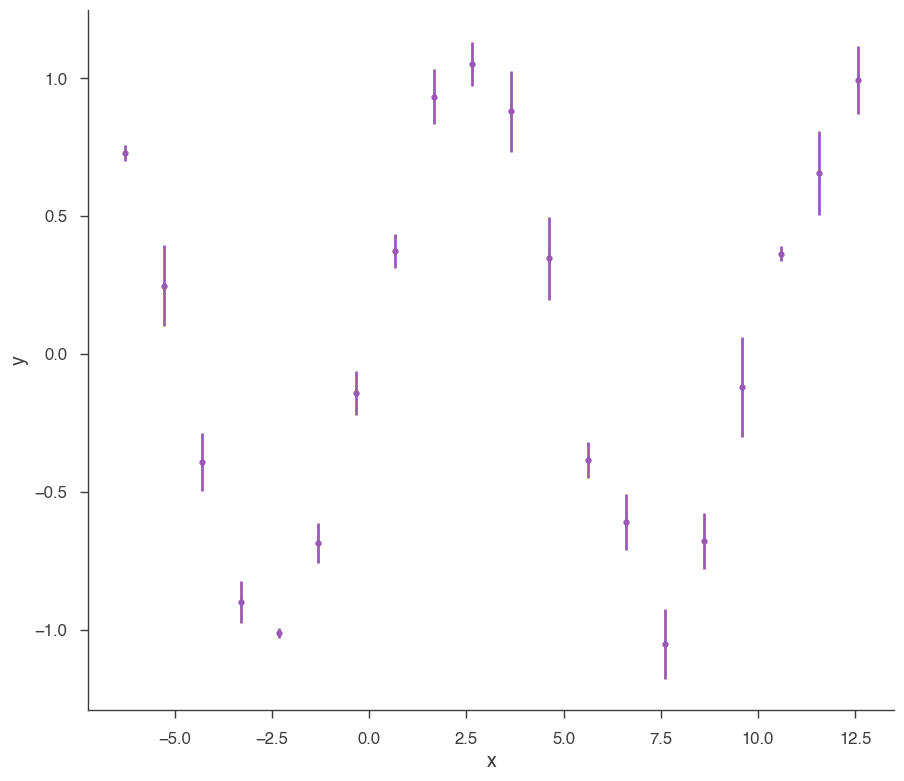

In [4]:
sin = Sin(K=1, f=0.1)
sin.phi.fix = True
sin.K.prior = Log_uniform_prior(lower_bound=0.5, upper_bound=1.5)
sin.f.prior = Uniform_prior(lower_bound=0, upper_bound=0.5)

model = Model(PointSource("demo", 0, 0, spectral_shape=sin))

x = np.linspace(-2 * np.pi, 4 * np.pi, 20)
yerr = np.random.uniform(0.01, 0.2, 20)


xyl = XYLike.from_function("demo", sin, x, yerr)
xyl.plot()

bayes_analysis = BayesianAnalysis(model, DataList(xyl))

## emcee

         INFO      sampler set to emcee                                                    ]8;id=371188;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=16587;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

05:15:31 INFO      Mean acceptance fraction: 0.7034999999999999                                ]8;id=78729;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py\emcee_sampler.py]8;;\:]8;id=240582;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py#157\157]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=772656;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=414306;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=792663;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=595459;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.010 -0.017 +0.015,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(10.00 -0.035 +0.04) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-6.831485
total,-6.831485


Values of statistical measures:

,statistical measures
AIC,18.368852
BIC,19.654435
DIC,17.847605
PDIC,2.088062


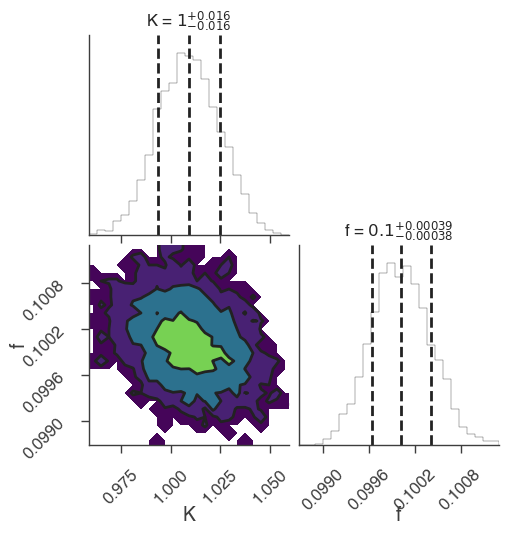

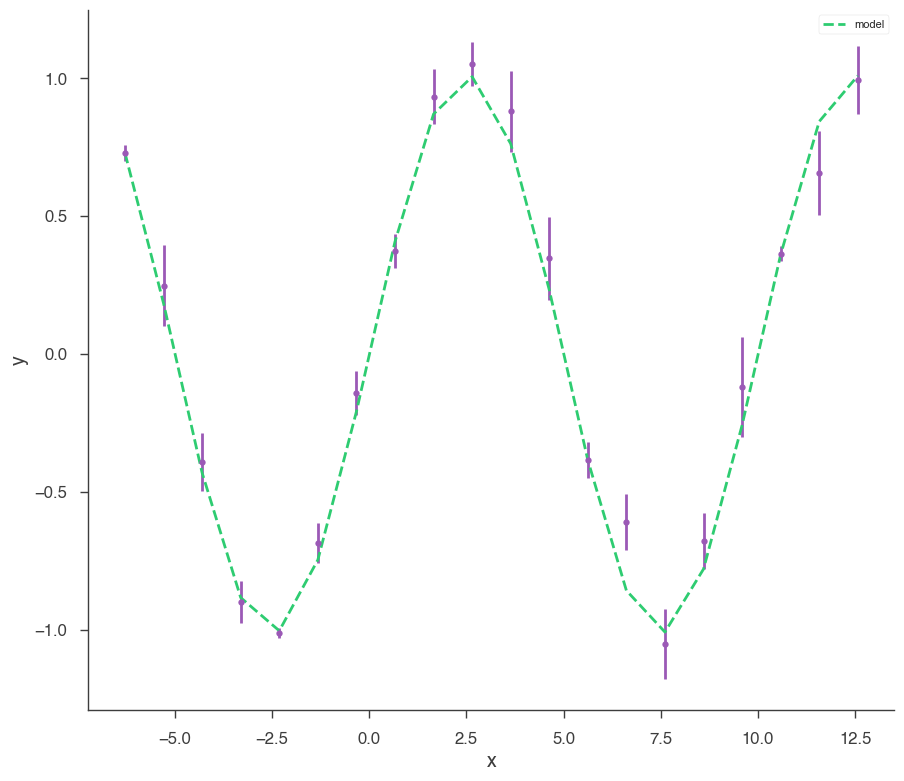

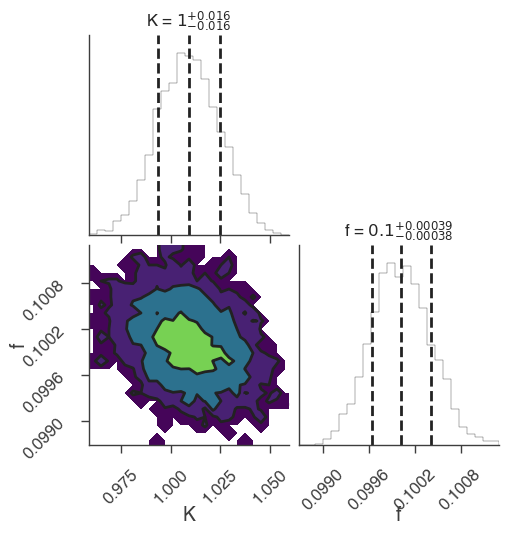

In [5]:
bayes_analysis.set_sampler("emcee")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## multinest

05:15:32 INFO      sampler set to multinest                                                ]8;id=700893;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=914046;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    2
 *****************************************************


  analysing data from chains/fit-.txt ln(ev)=  -16.574413947909981      +/-  0.14780047452922601     
 Total Likelihood Evaluations:         5895
 Sampling finished. Exiting MultiNest



05:15:33 INFO      fit restored to maximum of posterior                                         ]8;id=896778;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=875501;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=820964;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=591865;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.011 -0.017 +0.015,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(10.00 +/- 0.04) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-6.833564
total,-6.833564


Values of statistical measures:

,statistical measures
AIC,18.373010
BIC,19.658592
DIC,17.793983
PDIC,2.064988
log(Z),-7.198177


         INFO      deleting the chain directory chains                                     ]8;id=371819;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py\multinest_sampler.py]8;;\:]8;id=304174;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py#255\255]8;;\

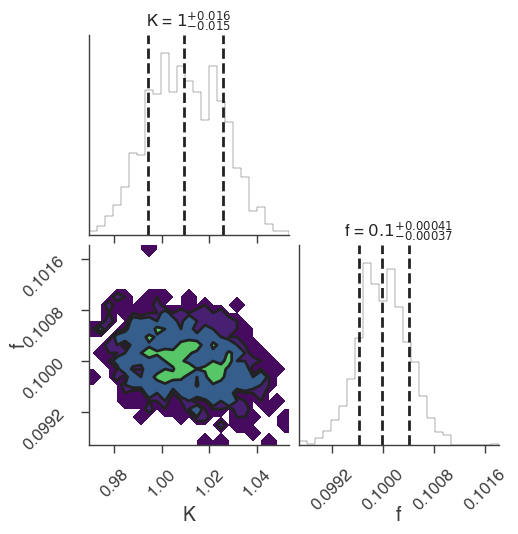

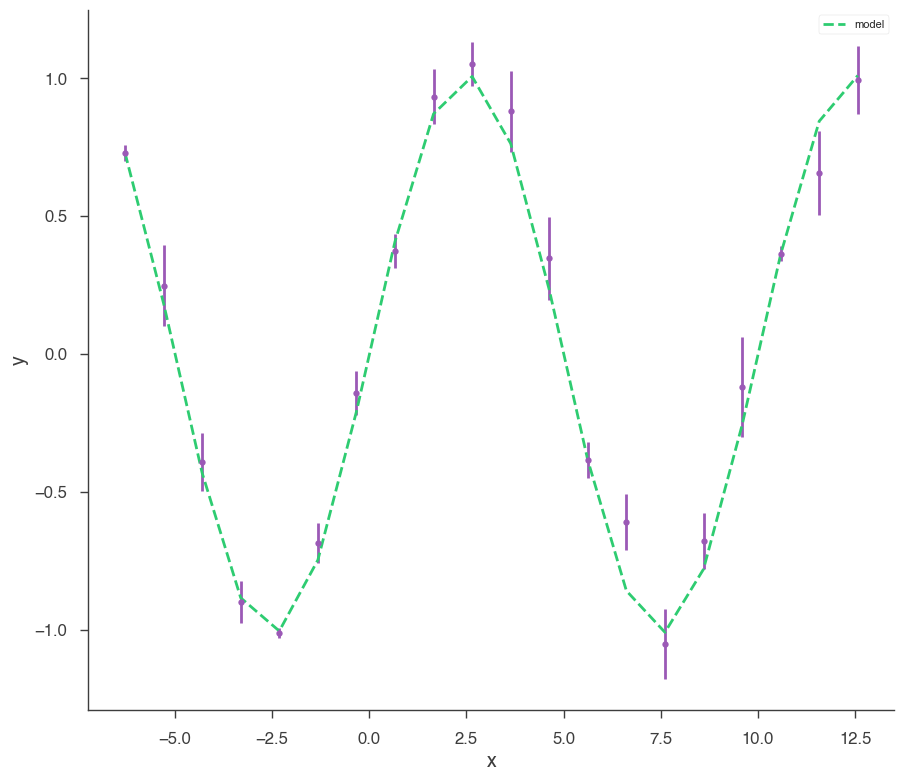

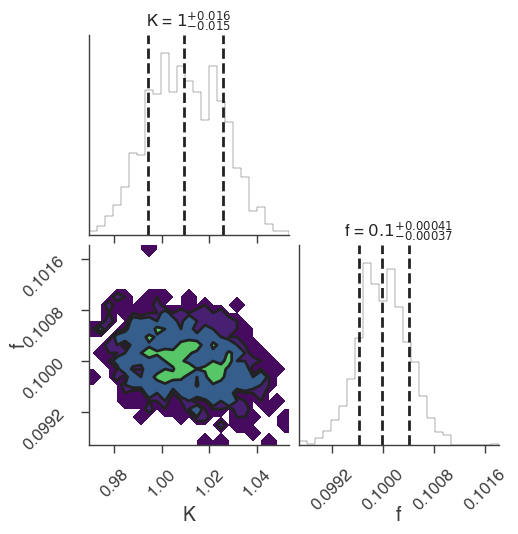

In [6]:
bayes_analysis.set_sampler("multinest")
bayes_analysis.sampler.setup(n_live_points=400, resume=False, auto_clean=True)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## dynesty

         INFO      sampler set to dynesty_nested                                           ]8;id=449923;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=808912;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

235it [00:00, 2344.11it/s, bound: 0 | nc: 1 | ncall: 744 | eff(%): 31.586 | loglstar:   -inf < -3518.240 <    inf | logz: -3525.007 +/-  0.126 | dlogz: 3435.849 >  0.409]

470it [00:00, 1923.32it/s, bound: 0 | nc: 7 | ncall: 1340 | eff(%): 35.075 | loglstar:   -inf < -2491.435 <    inf | logz: -2498.430 +/-  0.126 | dlogz: 2423.783 >  0.409]

668it [00:00, 1487.40it/s, bound: 0 | nc: 4 | ncall: 2157 | eff(%): 30.969 | loglstar:   -inf < -1804.147 <    inf | logz: -1811.615 +/-  0.131 | dlogz: 1802.999 >  0.409]

827it [00:00, 1167.73it/s, bound: 0 | nc: 15 | ncall: 3271 | eff(%): 25.283 | loglstar:   -inf < -1114.650 <    inf | logz: -1123.400 +/-  0.148 | dlogz: 1125.671 >  0.409]

955it [00:00, 1028.24it/s, bound: 0 | nc: 7 | ncall: 4481 | eff(%): 21.312 | loglstar:   -inf < -732.847 <    inf | logz: -741.019 +/-  0.139 | dlogz: 731.869 >  0.409]    

1065it [00:00, 867.67it/s, bound: 0 | nc: 26 | ncall: 5942 | eff(%): 17.923 | loglstar:   -inf < -585.743 <    inf | logz: -594.030 +/-  0.135 | dlogz: 585.198 >  0.409]

1158it [00:01, 721.85it/s, bound: 0 | nc: 30 | ncall: 7648 | eff(%): 15.141 | loglstar:   -inf < -500.344 <    inf | logz: -508.746 +/-  0.141 | dlogz: 499.904 >  0.409]

1236it [00:01, 647.38it/s, bound: 0 | nc: 2 | ncall: 9218 | eff(%): 13.409 | loglstar:   -inf < -443.159 <    inf | logz: -451.767 +/-  0.135 | dlogz: 442.370 >  0.409] 

1304it [00:01, 491.92it/s, bound: 0 | nc: 54 | ncall: 11114 | eff(%): 11.733 | loglstar:   -inf < -405.260 <    inf | logz: -413.872 +/-  0.142 | dlogz: 404.386 >  0.409]

1359it [00:01, 419.30it/s, bound: 0 | nc: 4 | ncall: 12752 | eff(%): 10.657 | loglstar:   -inf < -368.977 <    inf | logz: -377.980 +/-  0.140 | dlogz: 368.350 >  0.409] 

1405it [00:02, 338.58it/s, bound: 1 | nc: 1 | ncall: 13983 | eff(%): 10.048 | loglstar:   -inf < -336.823 <    inf | logz: -346.073 +/-  0.144 | dlogz: 336.547 >  0.409]

1629it [00:02, 656.22it/s, bound: 1 | nc: 6 | ncall: 14397 | eff(%): 11.315 | loglstar:   -inf < -205.958 <    inf | logz: -215.553 +/-  0.144 | dlogz: 205.149 >  0.409]

1724it [00:02, 638.84it/s, bound: 2 | nc: 1 | ncall: 14614 | eff(%): 11.797 | loglstar:   -inf < -170.180 <    inf | logz: -179.445 +/-  0.143 | dlogz: 168.646 >  0.409]

1930it [00:02, 919.67it/s, bound: 2 | nc: 3 | ncall: 14977 | eff(%): 12.886 | loglstar:   -inf < -108.455 <    inf | logz: -117.485 +/-  0.143 | dlogz: 106.007 >  0.409]

2051it [00:02, 836.15it/s, bound: 3 | nc: 1 | ncall: 15229 | eff(%): 13.468 | loglstar:   -inf < -80.592 <    inf | logz: -90.465 +/-  0.149 | dlogz: 78.790 >  0.409]   

2240it [00:02, 1057.83it/s, bound: 3 | nc: 3 | ncall: 15527 | eff(%): 14.426 | loglstar:   -inf < -57.603 <    inf | logz: -67.044 +/-  0.145 | dlogz: 54.733 >  0.409]

2370it [00:02, 923.37it/s, bound: 4 | nc: 1 | ncall: 15799 | eff(%): 15.001 | loglstar:   -inf < -42.865 <    inf | logz: -52.668 +/-  0.148 | dlogz: 40.024 >  0.409] 

2575it [00:02, 1165.56it/s, bound: 4 | nc: 3 | ncall: 16097 | eff(%): 15.997 | loglstar:   -inf < -28.546 <    inf | logz: -38.058 +/-  0.146 | dlogz: 24.842 >  0.409]

2715it [00:03, 1025.42it/s, bound: 5 | nc: 1 | ncall: 16385 | eff(%): 16.570 | loglstar:   -inf < -22.641 <    inf | logz: -31.995 +/-  0.145 | dlogz: 18.406 >  0.409]

2943it [00:03, 1299.10it/s, bound: 5 | nc: 4 | ncall: 16717 | eff(%): 17.605 | loglstar:   -inf < -15.991 <    inf | logz: -25.468 +/-  0.145 | dlogz: 11.305 >  0.409]

3096it [00:03, 1124.85it/s, bound: 6 | nc: 1 | ncall: 17014 | eff(%): 18.197 | loglstar:   -inf < -12.978 <    inf | logz: -22.554 +/-  0.146 | dlogz:  8.005 >  0.409]

3306it [00:03, 1339.15it/s, bound: 6 | nc: 4 | ncall: 17357 | eff(%): 19.047 | loglstar:   -inf < -10.374 <    inf | logz: -19.886 +/-  0.147 | dlogz:  4.826 >  0.409]

3461it [00:03, 1131.54it/s, bound: 7 | nc: 1 | ncall: 17664 | eff(%): 19.594 | loglstar:   -inf < -9.196 <    inf | logz: -18.754 +/-  0.146 | dlogz:  3.333 >  0.409] 

3670it [00:03, 1339.82it/s, bound: 7 | nc: 2 | ncall: 18007 | eff(%): 20.381 | loglstar:   -inf < -8.273 <    inf | logz: -17.768 +/-  0.146 | dlogz:  1.943 >  0.409]

3826it [00:04, 1147.20it/s, bound: 8 | nc: 1 | ncall: 18278 | eff(%): 20.932 | loglstar:   -inf < -7.812 <    inf | logz: -17.318 +/-  0.146 | dlogz:  1.275 >  0.409]

4028it [00:04, 1335.73it/s, bound: 8 | nc: 4 | ncall: 18622 | eff(%): 21.630 | loglstar:   -inf < -7.398 <    inf | logz: -16.930 +/-  0.146 | dlogz:  0.721 >  0.409]

4182it [00:04, 1145.29it/s, bound: 9 | nc: 1 | ncall: 18886 | eff(%): 22.143 | loglstar:   -inf < -7.208 <    inf | logz: -16.741 +/-  0.146 | dlogz:  0.467 >  0.409]

4229it [00:04, 960.52it/s, +400 | bound: 9 | nc: 1 | ncall: 19355 | eff(%): 24.421 | loglstar:   -inf < -6.822 <    inf | logz: -16.342 +/-  0.146 | dlogz:  0.001 >  0.409]

05:15:38 INFO      fit restored to maximum of posterior                                         ]8;id=963843;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=545216;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=642811;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=912972;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.010 -0.015 +0.014,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(10.00 +/- 0.04) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-6.832491
total,-6.832491


Values of statistical measures:

,statistical measures
AIC,18.370865
BIC,19.656447
DIC,17.627936
PDIC,1.981979
log(Z),-7.097053


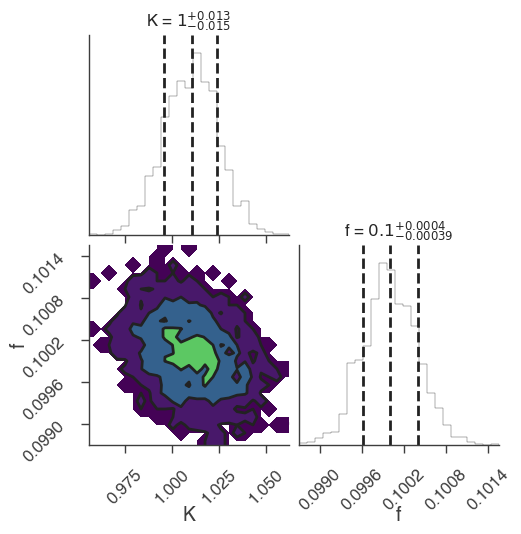

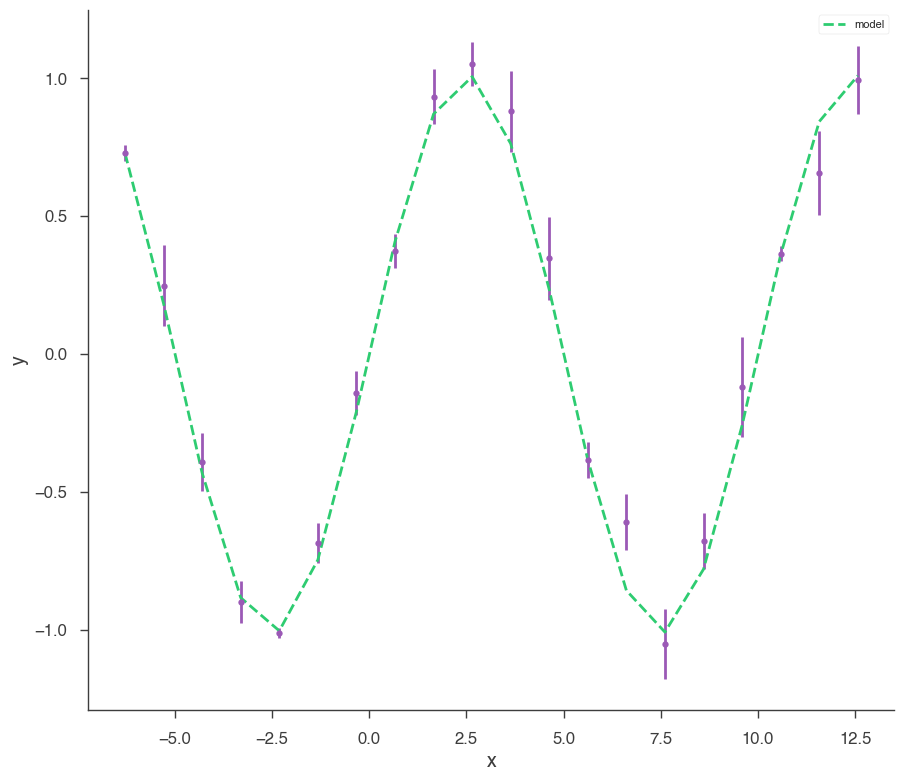

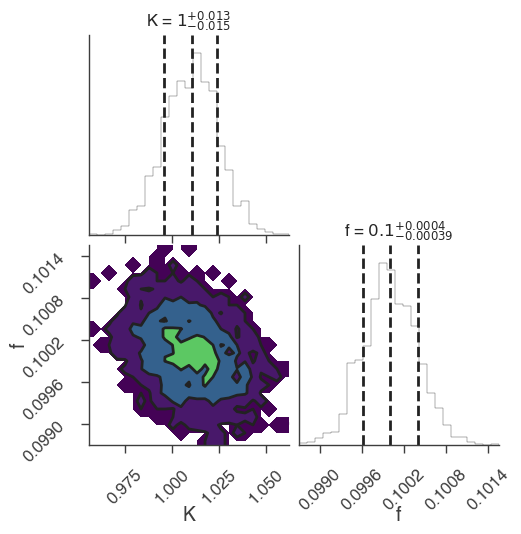

In [7]:
bayes_analysis.set_sampler("dynesty_nested")
bayes_analysis.sampler.setup(n_live_points=400)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

05:15:39 INFO      sampler set to dynesty_dynamic                                          ]8;id=157635;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=338299;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

0it [00:00, ?it/s]

119it [00:00, 1189.15it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 139 | eff(%): 18.623 | loglstar:   -inf < -5837.584 <    inf | logz: -5844.729 +/-  0.119 | dlogz: 5816.321 >  0.010]

340it [00:00, 1787.80it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 467 | eff(%): 35.160 | loglstar:   -inf < -3577.387 <    inf | logz: -3584.974 +/-  0.123 | dlogz: 3549.802 >  0.010]

519it [00:00, 1748.42it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 872 | eff(%): 37.828 | loglstar:   -inf < -2762.271 <    inf | logz: -2770.105 +/-  0.122 | dlogz: 2731.699 >  0.010]

694it [00:00, 1619.96it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 1410 | eff(%): 36.335 | loglstar:   -inf < -2420.378 <    inf | logz: -2428.465 +/-  0.123 | dlogz: 2418.900 >  0.010]

858it [00:00, 1479.57it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 2009 | eff(%): 34.197 | loglstar:   -inf < -1862.696 <    inf | logz: -1870.351 +/-  0.121 | dlogz: 1861.837 >  0.010]

1009it [00:00, 1072.01it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 3132 | eff(%): 27.781 | loglstar:   -inf < -1475.193 <    inf | logz: -1484.117 +/-  0.134 | dlogz: 1489.423 >  0.010]

1131it [00:00, 1025.31it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 4120 | eff(%): 24.481 | loglstar:   -inf < -1026.315 <    inf | logz: -1034.683 +/-  0.125 | dlogz: 1025.662 >  0.010]

1243it [00:01, 841.64it/s, batch: 0 | bound: 0 | nc: 40 | ncall: 5249 | eff(%): 21.621 | loglstar:   -inf < -776.167 <    inf | logz: -785.400 +/-  0.133 | dlogz: 777.543 >  0.010]   

1337it [00:01, 794.03it/s, batch: 0 | bound: 0 | nc: 18 | ncall: 6346 | eff(%): 19.530 | loglstar:   -inf < -625.085 <    inf | logz: -633.736 +/-  0.126 | dlogz: 624.035 >  0.010]

1423it [00:01, 675.63it/s, batch: 0 | bound: 0 | nc: 41 | ncall: 7568 | eff(%): 17.638 | loglstar:   -inf < -556.272 <    inf | logz: -564.658 +/-  0.122 | dlogz: 554.382 >  0.010]

1497it [00:01, 532.28it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 9134 | eff(%): 15.539 | loglstar:   -inf < -511.480 <    inf | logz: -519.645 +/-  0.119 | dlogz: 509.080 >  0.010] 

1558it [00:01, 466.55it/s, batch: 0 | bound: 0 | nc: 36 | ncall: 10399 | eff(%): 14.295 | loglstar:   -inf < -475.574 <    inf | logz: -484.075 +/-  0.123 | dlogz: 473.429 >  0.010]

1610it [00:02, 422.55it/s, batch: 0 | bound: 0 | nc: 15 | ncall: 11747 | eff(%): 13.146 | loglstar:   -inf < -453.765 <    inf | logz: -461.873 +/-  0.120 | dlogz: 451.007 >  0.010]

1656it [00:02, 371.68it/s, batch: 0 | bound: 0 | nc: 26 | ncall: 12911 | eff(%): 12.348 | loglstar:   -inf < -434.567 <    inf | logz: -442.731 +/-  0.122 | dlogz: 431.769 >  0.010]

1696it [00:02, 333.26it/s, batch: 0 | bound: 0 | nc: 52 | ncall: 14082 | eff(%): 11.631 | loglstar:   -inf < -413.732 <    inf | logz: -422.524 +/-  0.125 | dlogz: 411.653 >  0.010]

1731it [00:02, 304.45it/s, batch: 0 | bound: 0 | nc: 19 | ncall: 15036 | eff(%): 11.142 | loglstar:   -inf < -395.511 <    inf | logz: -404.500 +/-  0.130 | dlogz: 393.763 >  0.010]

1765it [00:02, 309.49it/s, batch: 0 | bound: 0 | nc: 59 | ncall: 15730 | eff(%): 10.875 | loglstar:   -inf < -378.838 <    inf | logz: -388.629 +/-  0.132 | dlogz: 378.197 >  0.010]

1797it [00:02, 281.59it/s, batch: 0 | bound: 0 | nc: 11 | ncall: 16652 | eff(%): 10.477 | loglstar:   -inf < -366.563 <    inf | logz: -375.034 +/-  0.124 | dlogz: 363.794 >  0.010]

1826it [00:02, 250.64it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 17617 | eff(%): 10.079 | loglstar:   -inf < -355.742 <    inf | logz: -364.750 +/-  0.125 | dlogz: 353.575 >  0.010] 

1852it [00:03, 213.68it/s, batch: 0 | bound: 1 | nc: 2 | ncall: 17893 | eff(%): 10.069 | loglstar:   -inf < -344.787 <    inf | logz: -353.712 +/-  0.126 | dlogz: 342.451 >  0.010]

2058it [00:03, 599.84it/s, batch: 0 | bound: 1 | nc: 3 | ncall: 18222 | eff(%): 10.992 | loglstar:   -inf < -252.731 <    inf | logz: -262.509 +/-  0.130 | dlogz: 251.484 >  0.010]

2214it [00:03, 820.44it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 18584 | eff(%): 11.601 | loglstar:   -inf < -192.907 <    inf | logz: -202.490 +/-  0.131 | dlogz: 191.001 >  0.010]

2315it [00:03, 727.04it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 18736 | eff(%): 12.035 | loglstar:   -inf < -160.718 <    inf | logz: -170.125 +/-  0.133 | dlogz: 158.749 >  0.010]

2522it [00:03, 1033.43it/s, batch: 0 | bound: 2 | nc: 5 | ncall: 19163 | eff(%): 12.826 | loglstar:   -inf < -113.392 <    inf | logz: -122.643 +/-  0.130 | dlogz: 110.730 >  0.010]

2646it [00:03, 884.39it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 19416 | eff(%): 13.286 | loglstar:   -inf < -91.291 <    inf | logz: -100.393 +/-  0.129 | dlogz: 88.185 >  0.010]   

2859it [00:03, 1161.02it/s, batch: 0 | bound: 3 | nc: 2 | ncall: 19722 | eff(%): 14.138 | loglstar:   -inf < -63.442 <    inf | logz: -72.982 +/-  0.132 | dlogz: 60.351 >  0.010]

3034it [00:04, 1302.73it/s, batch: 0 | bound: 3 | nc: 3 | ncall: 20071 | eff(%): 14.749 | loglstar:   -inf < -46.965 <    inf | logz: -56.711 +/-  0.132 | dlogz: 43.715 >  0.010]

3183it [00:04, 1065.17it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 20270 | eff(%): 15.325 | loglstar:   -inf < -38.030 <    inf | logz: -47.541 +/-  0.131 | dlogz: 34.213 >  0.010]

3383it [00:04, 1272.55it/s, batch: 0 | bound: 4 | nc: 3 | ncall: 20574 | eff(%): 16.053 | loglstar:   -inf < -27.987 <    inf | logz: -37.927 +/-  0.132 | dlogz: 24.348 >  0.010]

3531it [00:04, 1031.77it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 20895 | eff(%): 16.504 | loglstar:   -inf < -22.386 <    inf | logz: -32.068 +/-  0.133 | dlogz: 18.173 >  0.010]

3740it [00:04, 1256.50it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 21187 | eff(%): 17.245 | loglstar:   -inf < -17.139 <    inf | logz: -27.046 +/-  0.133 | dlogz: 12.728 >  0.010]

3890it [00:04, 1307.22it/s, batch: 0 | bound: 5 | nc: 4 | ncall: 21484 | eff(%): 17.695 | loglstar:   -inf < -14.507 <    inf | logz: -24.306 +/-  0.133 | dlogz:  9.681 >  0.010]

4039it [00:04, 1069.00it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 21727 | eff(%): 18.172 | loglstar:   -inf < -12.456 <    inf | logz: -22.341 +/-  0.133 | dlogz:  7.464 >  0.010]

4274it [00:05, 1349.88it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 22065 | eff(%): 18.941 | loglstar:   -inf < -10.442 <    inf | logz: -20.197 +/-  0.133 | dlogz:  4.852 >  0.010]

4433it [00:05, 1112.56it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 22393 | eff(%): 19.364 | loglstar:   -inf < -9.495 <    inf | logz: -19.271 +/-  0.132 | dlogz:  3.626 >  0.010] 

4675it [00:05, 1389.65it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 22733 | eff(%): 20.122 | loglstar:   -inf < -8.427 <    inf | logz: -18.261 +/-  0.133 | dlogz:  2.219 >  0.010]

4856it [00:05, 1486.40it/s, batch: 0 | bound: 7 | nc: 4 | ncall: 23109 | eff(%): 20.568 | loglstar:   -inf < -7.911 <    inf | logz: -17.762 +/-  0.133 | dlogz:  1.496 >  0.010]

5027it [00:05, 1240.08it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 23357 | eff(%): 21.071 | loglstar:   -inf < -7.548 <    inf | logz: -17.419 +/-  0.133 | dlogz:  1.010 >  0.010]

5271it [00:05, 1506.78it/s, batch: 0 | bound: 8 | nc: 3 | ncall: 23812 | eff(%): 21.681 | loglstar:   -inf < -7.267 <    inf | logz: -17.101 +/-  0.133 | dlogz:  0.576 >  0.010]

5446it [00:05, 1275.00it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 24071 | eff(%): 22.164 | loglstar:   -inf < -7.130 <    inf | logz: -16.955 +/-  0.133 | dlogz:  0.389 >  0.010]

5629it [00:06, 1394.66it/s, batch: 0 | bound: 9 | nc: 2 | ncall: 24420 | eff(%): 22.588 | loglstar:   -inf < -7.032 <    inf | logz: -16.849 +/-  0.133 | dlogz:  0.260 >  0.010]

5789it [00:06, 1129.93it/s, batch: 0 | bound: 10 | nc: 3 | ncall: 24728 | eff(%): 22.947 | loglstar:   -inf < -6.972 <    inf | logz: -16.784 +/-  0.133 | dlogz:  0.184 >  0.010]

5996it [00:06, 1327.47it/s, batch: 0 | bound: 10 | nc: 2 | ncall: 25032 | eff(%): 23.484 | loglstar:   -inf < -6.925 <    inf | logz: -16.726 +/-  0.133 | dlogz:  0.118 >  0.010]

6158it [00:06, 1087.87it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 25393 | eff(%): 23.782 | loglstar:   -inf < -6.898 <    inf | logz: -16.695 +/-  0.133 | dlogz:  0.085 >  0.010]

6375it [00:06, 1308.50it/s, batch: 0 | bound: 11 | nc: 3 | ncall: 25695 | eff(%): 24.337 | loglstar:   -inf < -6.872 <    inf | logz: -16.666 +/-  0.133 | dlogz:  0.054 >  0.010]

6554it [00:06, 1417.14it/s, batch: 0 | bound: 11 | nc: 2 | ncall: 26046 | eff(%): 24.689 | loglstar:   -inf < -6.858 <    inf | logz: -16.650 +/-  0.133 | dlogz:  0.038 >  0.010]

6718it [00:07, 1133.97it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 26324 | eff(%): 25.045 | loglstar:   -inf < -6.849 <    inf | logz: -16.640 +/-  0.133 | dlogz:  0.027 >  0.010]

6898it [00:07, 1274.40it/s, batch: 0 | bound: 12 | nc: 3 | ncall: 26641 | eff(%): 25.415 | loglstar:   -inf < -6.841 <    inf | logz: -16.632 +/-  0.133 | dlogz:  0.019 >  0.010]

7048it [00:07, 1032.61it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 26928 | eff(%): 25.696 | loglstar:   -inf < -6.836 <    inf | logz: -16.627 +/-  0.133 | dlogz:  0.014 >  0.010]

7347it [00:07, 1434.18it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 27301 | eff(%): 26.559 | loglstar:   -inf < -6.829 <    inf | logz: -16.621 +/-  0.133 | dlogz:  0.007 >  0.010]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



7709it [00:08, 803.59it/s, batch: 1 | bound: 0 | nc: 1 | ncall: 27663 | eff(%): 27.868 | loglstar: -8.545 < -7.330 < -7.275 | logz: -16.614 +/-  0.137 | stop:  1.391]            

7893it [00:08, 926.49it/s, batch: 1 | bound: 2 | nc: 2 | ncall: 27926 | eff(%): 27.746 | loglstar: -8.545 < -7.918 < -7.275 | logz: -16.614 +/-  0.137 | stop:  1.391]

8053it [00:08, 1023.05it/s, batch: 1 | bound: 2 | nc: 9 | ncall: 28284 | eff(%): 27.957 | loglstar: -8.545 < -7.593 < -7.275 | logz: -16.614 +/-  0.137 | stop:  1.391]

8208it [00:08, 990.72it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 28524 | eff(%): 28.260 | loglstar: -8.545 < -7.376 < -7.275 | logz: -16.614 +/-  0.137 | stop:  1.391] 

8614it [00:08, 1539.79it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 28992 | eff(%): 29.490 | loglstar: -8.545 < -6.993 < -7.275 | logz: -16.614 +/-  0.137 | stop:  1.391]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



8831it [00:09, 659.88it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 29221 | eff(%): 29.670 | loglstar: -9.042 < -9.002 < -8.543 | logz: -16.602 +/-  0.112 | stop:  1.054] 

9299it [00:09, 1074.66it/s, batch: 2 | bound: 2 | nc: 1 | ncall: 29737 | eff(%): 31.109 | loglstar: -9.042 < -7.252 < -8.543 | logz: -16.602 +/-  0.112 | stop:  1.054]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



9551it [00:10, 631.33it/s, batch: 3 | bound: 2 | nc: 1 | ncall: 30022 | eff(%): 31.322 | loglstar: -9.435 < -8.804 < -9.035 | logz: -16.601 +/-  0.104 | stop:  1.069] 


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



10006it [00:11, 663.28it/s, batch: 3 | bound: 2 | nc: 1 | ncall: 30493 | eff(%): 32.814 | loglstar: -9.435 < -6.823 < -9.035 | logz: -16.601 +/-  0.104 | stop:  0.808]

10006it [00:11, 902.01it/s, batch: 3 | bound: 2 | nc: 1 | ncall: 30493 | eff(%): 32.814 | loglstar: -9.435 < -6.823 < -9.035 | logz: -16.601 +/-  0.104 | stop:  0.808]

05:15:50 INFO      fit restored to maximum of posterior                                         ]8;id=103356;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=604284;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=350727;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=710764;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.010 +/- 0.014,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(10.00 +/- 0.04) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-6.831431
total,-6.831431


Values of statistical measures:

,statistical measures
AIC,18.368745
BIC,19.654327
DIC,17.453666
PDIC,1.895196
log(Z),-7.207368


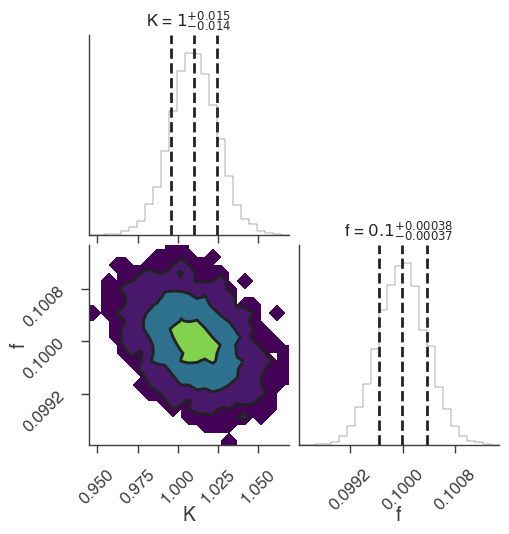

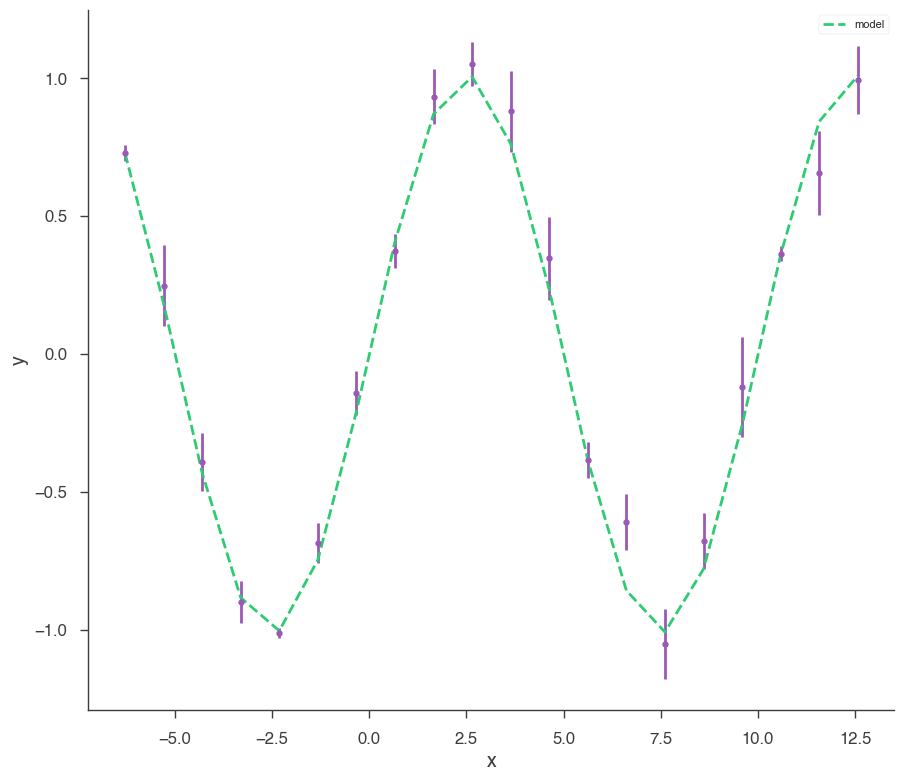

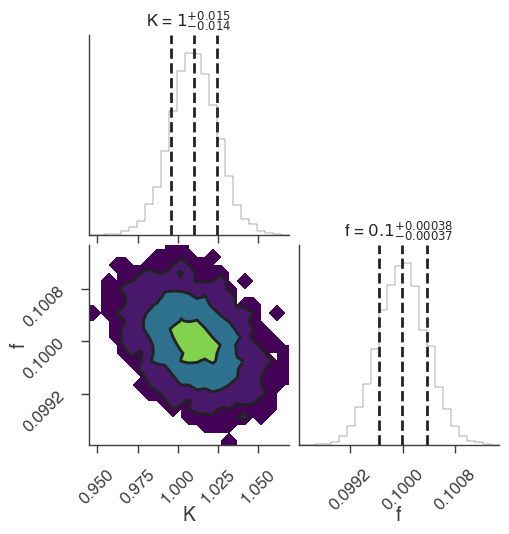

In [8]:
bayes_analysis.set_sampler("dynesty_dynamic")
bayes_analysis.sampler.setup(
    stop_function=dynesty.utils.old_stopping_function, n_effective=None
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## zeus

05:15:51 INFO      sampler set to zeus                                                     ]8;id=688606;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=290514;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

The run method has been deprecated and it will be removed. Please use the new run_mcmc method.


Initialising ensemble of 20 walkers...


Sampling progress :   0%|          | 0/625 [00:00<?, ?it/s]

Sampling progress :   1%|          | 6/625 [00:00<00:11, 55.85it/s]

Sampling progress :   2%|▏         | 13/625 [00:00<00:10, 60.83it/s]

Sampling progress :   3%|▎         | 20/625 [00:00<00:09, 64.71it/s]

Sampling progress :   4%|▍         | 28/625 [00:00<00:08, 70.01it/s]

Sampling progress :   6%|▌         | 36/625 [00:00<00:08, 72.08it/s]

Sampling progress :   7%|▋         | 44/625 [00:00<00:08, 70.55it/s]

Sampling progress :   8%|▊         | 53/625 [00:00<00:07, 74.28it/s]

Sampling progress :  10%|▉         | 61/625 [00:00<00:07, 71.02it/s]

Sampling progress :  11%|█         | 69/625 [00:00<00:07, 72.75it/s]

Sampling progress :  12%|█▏        | 77/625 [00:01<00:07, 74.47it/s]

Sampling progress :  14%|█▎        | 85/625 [00:01<00:07, 72.17it/s]

Sampling progress :  15%|█▍        | 93/625 [00:01<00:07, 73.95it/s]

Sampling progress :  16%|█▌        | 101/625 [00:01<00:07, 71.31it/s]

Sampling progress :  17%|█▋        | 109/625 [00:01<00:07, 72.37it/s]

Sampling progress :  19%|█▊        | 117/625 [00:01<00:07, 71.60it/s]

Sampling progress :  20%|██        | 126/625 [00:01<00:06, 74.45it/s]

Sampling progress :  22%|██▏       | 135/625 [00:01<00:06, 76.56it/s]

Sampling progress :  23%|██▎       | 144/625 [00:01<00:06, 77.97it/s]

Sampling progress :  24%|██▍       | 152/625 [00:02<00:06, 76.53it/s]

Sampling progress :  26%|██▌       | 160/625 [00:02<00:06, 72.78it/s]

Sampling progress :  27%|██▋       | 168/625 [00:02<00:06, 71.09it/s]

Sampling progress :  28%|██▊       | 176/625 [00:02<00:06, 70.60it/s]

Sampling progress :  29%|██▉       | 184/625 [00:02<00:06, 71.90it/s]

Sampling progress :  31%|███       | 192/625 [00:02<00:06, 70.82it/s]

Sampling progress :  32%|███▏      | 201/625 [00:02<00:05, 74.08it/s]

Sampling progress :  33%|███▎      | 209/625 [00:02<00:05, 73.76it/s]

Sampling progress :  35%|███▍      | 218/625 [00:02<00:05, 76.16it/s]

Sampling progress :  36%|███▌      | 226/625 [00:03<00:05, 76.00it/s]

Sampling progress :  37%|███▋      | 234/625 [00:03<00:05, 75.43it/s]

Sampling progress :  39%|███▊      | 242/625 [00:03<00:05, 75.03it/s]

Sampling progress :  40%|████      | 251/625 [00:03<00:04, 77.60it/s]

Sampling progress :  41%|████▏     | 259/625 [00:03<00:04, 75.29it/s]

Sampling progress :  43%|████▎     | 268/625 [00:03<00:04, 77.90it/s]

Sampling progress :  44%|████▍     | 277/625 [00:03<00:04, 79.76it/s]

Sampling progress :  46%|████▌     | 286/625 [00:03<00:04, 79.75it/s]

Sampling progress :  47%|████▋     | 295/625 [00:03<00:04, 80.95it/s]

Sampling progress :  49%|████▊     | 304/625 [00:04<00:03, 80.37it/s]

Sampling progress :  50%|█████     | 313/625 [00:04<00:03, 80.13it/s]

Sampling progress :  52%|█████▏    | 322/625 [00:04<00:03, 79.64it/s]

Sampling progress :  53%|█████▎    | 330/625 [00:04<00:03, 75.99it/s]

Sampling progress :  54%|█████▍    | 338/625 [00:04<00:03, 75.38it/s]

Sampling progress :  55%|█████▌    | 346/625 [00:04<00:03, 76.38it/s]

Sampling progress :  57%|█████▋    | 354/625 [00:04<00:03, 71.39it/s]

Sampling progress :  58%|█████▊    | 362/625 [00:04<00:03, 73.70it/s]

Sampling progress :  59%|█████▉    | 370/625 [00:04<00:03, 74.17it/s]

Sampling progress :  60%|██████    | 378/625 [00:05<00:03, 74.26it/s]

Sampling progress :  62%|██████▏   | 386/625 [00:05<00:03, 71.86it/s]

Sampling progress :  63%|██████▎   | 394/625 [00:05<00:03, 72.87it/s]

Sampling progress :  64%|██████▍   | 402/625 [00:05<00:03, 69.92it/s]

Sampling progress :  66%|██████▌   | 411/625 [00:05<00:02, 72.66it/s]

Sampling progress :  67%|██████▋   | 419/625 [00:05<00:02, 72.06it/s]

Sampling progress :  68%|██████▊   | 427/625 [00:05<00:02, 69.27it/s]

Sampling progress :  70%|██████▉   | 435/625 [00:05<00:02, 71.59it/s]

Sampling progress :  71%|███████   | 444/625 [00:06<00:02, 74.54it/s]

Sampling progress :  72%|███████▏  | 452/625 [00:06<00:02, 71.91it/s]

Sampling progress :  74%|███████▎  | 460/625 [00:06<00:02, 73.44it/s]

Sampling progress :  75%|███████▌  | 469/625 [00:06<00:02, 75.79it/s]

Sampling progress :  76%|███████▋  | 478/625 [00:06<00:01, 79.13it/s]

Sampling progress :  78%|███████▊  | 486/625 [00:06<00:01, 74.75it/s]

Sampling progress :  79%|███████▉  | 494/625 [00:06<00:01, 73.93it/s]

Sampling progress :  80%|████████  | 502/625 [00:06<00:01, 72.12it/s]

Sampling progress :  82%|████████▏ | 510/625 [00:06<00:01, 73.14it/s]

Sampling progress :  83%|████████▎ | 518/625 [00:07<00:01, 72.28it/s]

Sampling progress :  84%|████████▍ | 526/625 [00:07<00:01, 71.86it/s]

Sampling progress :  85%|████████▌ | 534/625 [00:07<00:01, 73.41it/s]

Sampling progress :  87%|████████▋ | 542/625 [00:07<00:01, 72.88it/s]

Sampling progress :  88%|████████▊ | 550/625 [00:07<00:01, 70.64it/s]

Sampling progress :  89%|████████▉ | 558/625 [00:07<00:00, 72.67it/s]

Sampling progress :  91%|█████████ | 567/625 [00:07<00:00, 75.47it/s]

Sampling progress :  92%|█████████▏| 576/625 [00:07<00:00, 77.12it/s]

Sampling progress :  93%|█████████▎| 584/625 [00:07<00:00, 75.55it/s]

Sampling progress :  95%|█████████▍| 592/625 [00:08<00:00, 73.51it/s]

Sampling progress :  96%|█████████▌| 600/625 [00:08<00:00, 73.49it/s]

Sampling progress :  97%|█████████▋| 608/625 [00:08<00:00, 70.66it/s]

Sampling progress :  99%|█████████▊| 616/625 [00:08<00:00, 70.77it/s]

Sampling progress : 100%|█████████▉| 624/625 [00:08<00:00, 67.49it/s]

Sampling progress : 100%|██████████| 625/625 [00:08<00:00, 73.48it/s]

05:16:00 INFO      fit restored to maximum of posterior                                         ]8;id=846251;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=716320;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=967455;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=57184;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Summary


-------


Number of Generations: 625


Number of Parameters: 2


Number of Walkers: 20


Number of Tuning Generations: 28


Scale Factor: 1.405118


Mean Integrated Autocorrelation Time: 2.9


Effective Sample Size: 4313.65


Number of Log Probability Evaluations: 64983


Effective Samples per Log Probability Evaluation: 0.066381


None


Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.010 -0.016 +0.015,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(10.00 +/- 0.04) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-6.831516
total,-6.831516


Values of statistical measures:

,statistical measures
AIC,18.368914
BIC,19.654496
DIC,17.711939
PDIC,2.023822


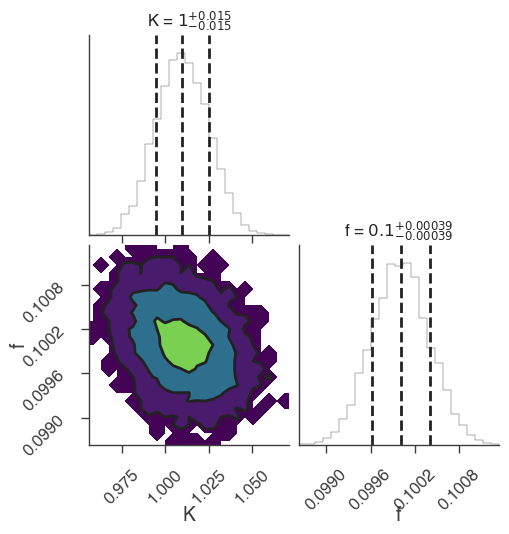

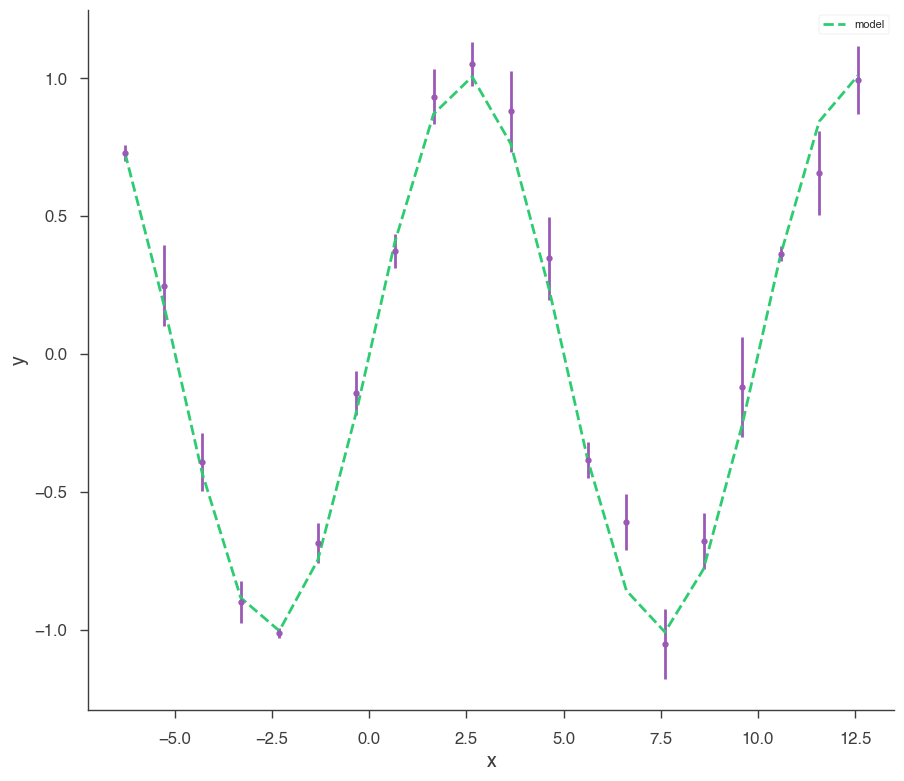

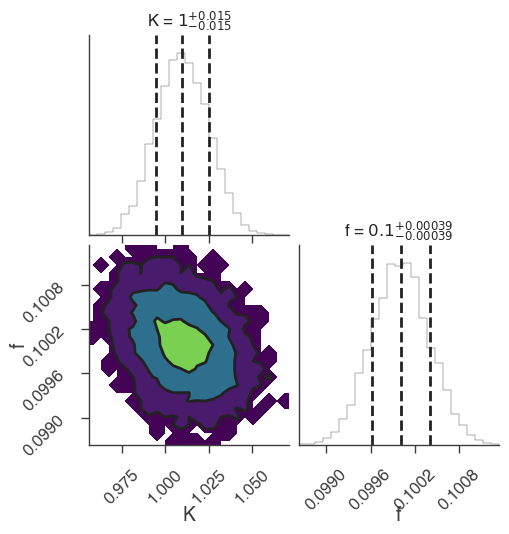

In [9]:
bayes_analysis.set_sampler("zeus")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## ultranest

05:16:01 INFO      sampler set to ultranest                                                ]8;id=18477;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=606644;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#202\202]8;;\

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-7  


[ultranest] Likelihood function evaluations: 7647


[ultranest]   logZ = -16.71 +- 0.107


[ultranest] Effective samples strategy satisfied (ESS = 984.9, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.07 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.42, need <0.5)


[ultranest]   logZ error budget: single: 0.15 bs:0.11 tail:0.41 total:0.42 required:<0.50


[ultranest] done iterating.


05:16:08 INFO      fit restored to maximum of posterior                                         ]8;id=883401;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=782637;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=563797;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=754745;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,1.009 -0.014 +0.015,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(10.00 +/- 0.04) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-6.838926
total,-6.838926


Values of statistical measures:

,statistical measures
AIC,18.383735
BIC,19.669317
DIC,17.704202
PDIC,2.019729
log(Z),-7.258329


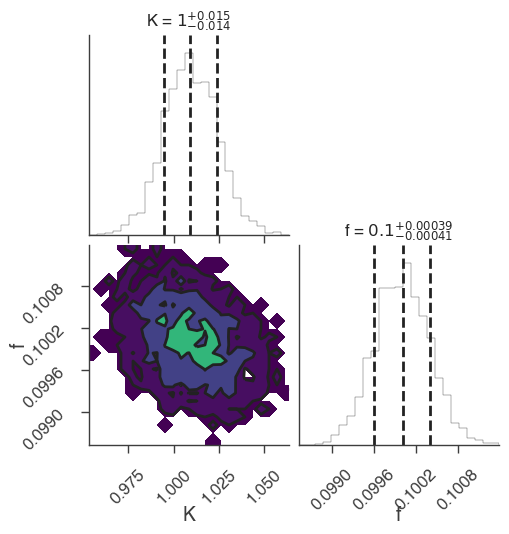

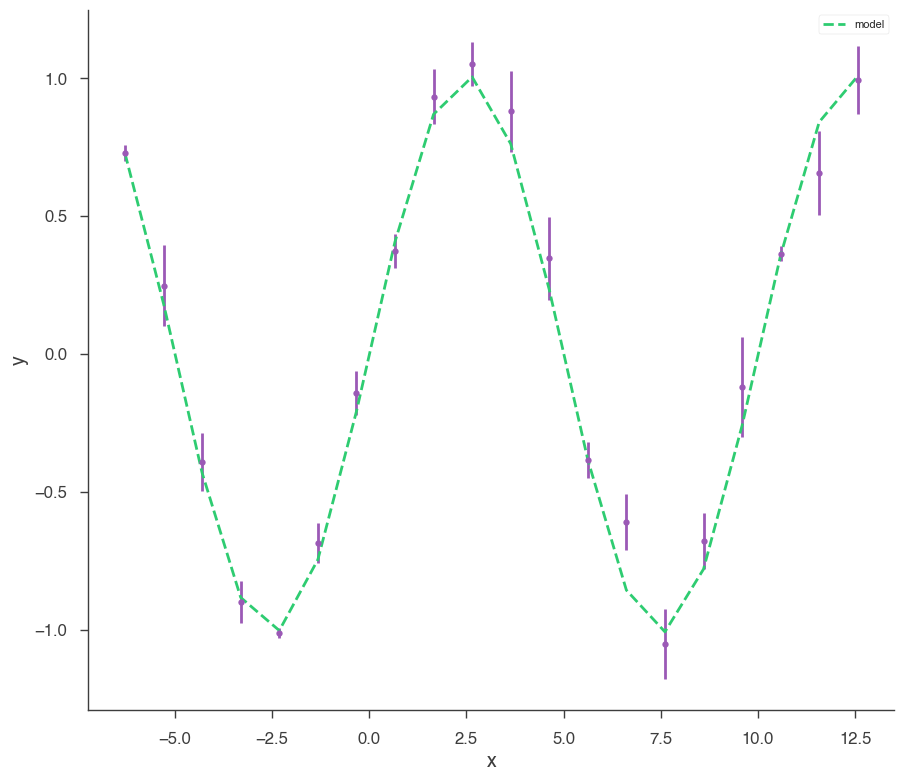

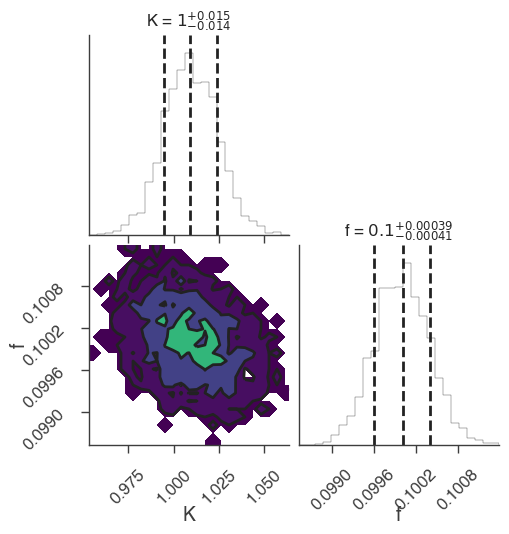

In [10]:
bayes_analysis.set_sampler("ultranest")
bayes_analysis.sampler.setup(
    min_num_live_points=400, frac_remain=0.5, use_mlfriends=False
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()